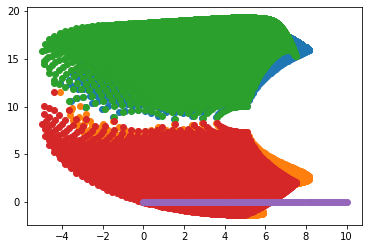

In [1]:
# 5-Bar Linkage : Forward Kinematics
#
# from Study and Development of Parallel Robots Based On 5-Bar Linkage
# Manh Tuong Hoang, Trung Tin Vuong, Cong Bang Pham 2015
# https://www.researchgate.net/publication/283356024_Study_and_Development_of_Parallel_Robots_Based_On_5-Bar_Linkage

import math
import numpy as np

import matplotlib.pyplot as plt


angleMin = 60 * np.pi/180
angleMax = 120 * np.pi/180

base = 10 # distance between servos
humerus = 10 # from each servo to elbow
radius = 10 # elbow to pen

baselineX = np.linspace(0, base, 100)
baselineY = np.zeros(100)

anglesL = np.linspace(angleMin, angleMax, 100)
anglesR = np.linspace(angleMin, angleMax, 100)

xPlus = []
xMinus = []
yPlus = []
yMinus = []

for angleL in anglesL:
    for angleR in anglesR:
        E = 2*radius*(base+humerus*(math.cos(angleR)-math.cos(angleL)))
        # print(E)
        F = 2*humerus*radius*(math.sin(angleR)-math.sin(angleL))
        G = base*base+2*humerus*humerus+2*base*humerus*math.cos(angleR)-2*humerus*humerus*math.cos(angleR-angleL)

        if G-E != 0 and E*E+F*F-G*G > 0: # avoid div by zero, sqrt of negative

            lumpXplus =  (-F+math.sqrt(E*E+F*F-G*G)) / (G-E)
            lumpXminus = (-F-math.sqrt(E*E+F*F-G*G)) / (G-E)
            lumpYplus =  (-F+math.sqrt(E*E+F*F-G*G)) / (G-E)
            lumpYminus = (-F-math.sqrt(E*E+F*F-G*G)) / (G-E)
            
            xPlus. append(base+humerus*math.cos(angleR)+radius*math.cos(2*math.atan(lumpXplus)))
            xMinus.append(base+humerus*math.cos(angleR)+radius*math.cos(2*math.atan(lumpXminus)))
            
            yPlus. append(humerus*math.sin(angleR)+radius*math.sin(2*math.atan(lumpYplus)))
            yMinus.append(humerus*math.sin(angleR)+radius*math.sin(2*math.atan(lumpYminus)))

plt.scatter(xMinus, yMinus)
plt.scatter(xMinus, yPlus)
plt.scatter(xPlus, yMinus)
plt.scatter(xPlus, yPlus)

plt.scatter(baselineX, baselineY)
